# Bayesian inference: part 1

## I. Frequentist vs Bayesian Approaches

Both the model fitting and model selection problems can be approached from either a *frequentist* or a *Bayesian* standpoint.
Fundamentally, the difference between these lies in the **definition of probability** that they use:

- **A frequentist probability is a measure *long-run frequency* of (real or imagined) repeated trials.** Among other things, this generally means that observed data can be described probabilistically (you can repeat the experiment and get a different realization) while model parameters are fixed, and cannot be described probabilistically (the universe remains the same no matter how many times you observe it). 

- **A Bayesian probability is a *quantification of belief*.** Among other things, this generally means that observed data are treated as fixed (you know exactly what values you measured) while model parameters – including the "true" values of the data reflected by noisy measurements – are treated probabilistically (your degree of knowledge about the universe changes as you gather more data).


**Example**: The measurement of the flux of a star.

- For frequentists, **probability** only has meaning in terms of a **limiting case of repeated measurements**. That is, if I measure the photon flux F from a given star (we'll assume for now that the star's flux does not vary with time), then measure it again, then again, and so on, each time I will get a slightly different answer due to the statistical error of my measuring device. In the limit of a large number of measurements, the frequency of any given value indicates the probability of measuring that value. For frequentists probabilities are fundamentally related to **frequencies of events**. This means, for example, that in a strict frequentist view, it is *meaningless* to talk about the probability of the true flux of the star: the true flux is (by definition) a single fixed value, and to talk about a frequency distribution for a fixed value is nonsense.

- For Bayesians, the concept of probability is extended to cover degrees of certainty about statements. Say a Bayesian claims to measure the flux F of a star with some probability P(F): that probability can certainly be estimated from frequencies in the limit of a large number of repeated experiments, but this is not fundamental. The probability is a statement of my knowledge of what the measurement result will be. For Bayesians, probabilities are **fundamentally related to our own knowledge about an event**. This means, for example, that in a Bayesian view, we can meaningfully talk about the probability that the true flux of a star lies in a given range. That probability codifies our knowledge of the value based on prior information and/or available data.

In summary: 

- *Frequentist inference*: estimating an error on a parameter means: "how much would the parameter change if I had other data". 
- *Bayesian inference*: estimating an error on a parameter really means "deriving a parameter and uncertainties on it", something a frequentist cannot say as it strictly does not make sense (there is only one true value of a parameter that he tries to estimate and this does not make sense to speak of an uncertainty on a true value). For that purpose, Bayesian inference uses posterior distribution of the parameters (given the data) $p({\boldsymbol{\theta}} \mid D)$. 




## II. The Bayesian Problem Setting

Thus the end-goal of a Bayesian analysis is a probabilistic statement about the universe.
Roughly we want to measure

$$
P(science)
$$

Where "science" might be encapsulated in the cosmological model, the mass of a planet around a star, or whatever else we're interested in learning about.

We don't of course measure this without reference to data, so more specifically we want to measure

$$
P(science~|~data)
$$

which should be read "the probability of the science *given* the data."

Of course, we should be explicit that this measurement is not done in a vaccum: generally before observing any data we have *some* degree of background information that informs the science, so we should actually write

$$
P(science~|~data, background\ info)
$$

This should be read "the probability of the science given the data *and* the background information".

Finally, there are often things in the scientific model that we don't particularly care about: these are known as "nuisance parameters". As an example of a nuisance parameter, if you are finding a planet in radial velocity data, the secular motion of the star is *extremely* important to model correctly, but in the end you don't really care about its best-fit value.

With that in mind, we can write:

$$
P(science,nuisance\ parameters~|~data, background\ info)
$$

Where as before the comma should be read as an "and".



Mathematically, we write this down:

$$
P(\boldsymbol{\theta}_S, \boldsymbol{\theta}_N~|~D, I)
$$

- $\boldsymbol{\theta}_S$ represents the "science": the set of parameters that we are interested in constraining
- $\boldsymbol{\theta}_N$ represents the "nuisance parameters": the set of parameters that are important in the model, but are not particularly interesting for the scientific result.
- $D$ represents the "observed data"
- $I$ represents the information or knowledge you had before observing the data, including whatever made you choose the model you're fitting.

Finally, we'll often just write $\boldsymbol{\theta} = (\boldsymbol{\theta}_S, \boldsymbol{\theta}_N)$ as a shorthand for all the model parameters.

This quantity, $P(\boldsymbol{\theta}~|~D,I)$ is called the "posterior probability" and determining this quantity is the ultimate goal of a Bayesian analysis.

Now all we need to do is compute it!

The core problem is this: **We do not have a way to directly calculate** $P(\boldsymbol{\theta}~|~D,I)$. We often do have an expression for $P(D~|~\boldsymbol{\theta},I)$, but these two expressions are **not** equal.

$$
P(\boldsymbol{\theta}~|~D,I) \ne P(D~|~\boldsymbol{\theta},I)
$$


The way these two expressions are related is through the Bayes' theorem.

## III The Bayes' theorem / Bayes' Rule

The definition of conditional probability is entirely symmetric, so we can write

$$
P(A \cap B) = P(B \cap A)
$$

$$
P(A\mid B)\,P(B) = P(B\mid A)\,P(A)
$$

which is more commonly rearranged in this form:

$$
P(A\mid B) = \frac{P(B\mid A)\,P(A)}{P(B)}
$$

This is known as *Bayes' Theorem* or *Bayes' Rule*, and is important because it gives a formula for "flipping" conditional probabilities.



If we replace these labels (* This is were the devel of the controversy is hidden*), we find the usual expression of Bayes' theorem as it relates to model fitting:

$$
P(\boldsymbol{\theta} \mid D) = \frac{P(D\mid \boldsymbol{\theta})P(\boldsymbol{\theta})}{P(D)}
$$

Technically all the probabilities should all be conditioned on the information $I$:

$$
P(\boldsymbol{\theta} \mid D,I) = \frac{P(D \mid \boldsymbol{\theta},I)P(\boldsymbol{\theta} \mid I)}{P(D \mid I)}
$$

Recall $\boldsymbol{\theta}$ is the model we're interested in, $D$ is the observed data, and $I$ encodes all the prior information, including what led us to choose the particular model we're using.

*What is controversial in that expression ?* 

- We have a probability distribution over model parameters. A frequentist would say this is meaningless!

- The answer depends on the prior $P(\theta\mid I)$. This is the probability of the model parameters without any data: how are we supposed to know that?

Nevertheless, applying Bayes' rule in this manner gives us a means of quantifying our knowledge of the parameters $\theta$ given observed data

### III.1 Exploring the Terms in Bayesian Inference

We have four terms in the above expression, and we need to make sure we understand them:

#### $P(\boldsymbol{\theta}\mid D, I)$ is the *posterior*.
This is the quantity we want to compute: our knowledge of the model given the data & background knowledge (including the choice of model).

#### $P(D\mid\boldsymbol{\theta},I)$ is the *likelihood*.
This measures the probability of seeing our data given the model. This is identical to the quantity maximized in frequentist *maximum-likelihood* approaches.

#### $P(\boldsymbol{\theta}\mid I)$ is the *prior*.
This encodes any knowledge we had about the answer before measuring the current data.

#### $P(D\mid I)$ is the *Fully Marginalized Likelihood* (or *Evidence*)
You might prefer the acronym *FML* (it's also called the *Evidence* - namely the evidence that the data D was generated by the model - among other things). Its complete expression is:

$$
P(D\mid I) = \int P(D\mid\boldsymbol{\theta}, I) \, P(\boldsymbol{\theta}) \, \rm{d}\boldsymbol{\theta}
$$

In the context of **model fitting**, it acts as a normalization constant and in most cases can be ignored. In **model selection**, the FML can become important (but it is costly to calculate as you need to evaluate the likelihood for all the values of your parameters $\boldsymbol{\theta}$.

### III.2 What is the Point?

At first blush, this might all seem needlessly complicated. Why not simply maximize the likelihood and be done with it? Why multiply by a prior at all?

- *Purity*: you quantify knowledge in terms of a probability, then follow the math to compute the answer. The fact that you need to specify a prior might be inconvenient, but we can't simply pretend it away.
- *Parameter Uncertainties*: Whether frequentist or Bayesian, the maximum likelihood "point estimate" is only a small part of the picture. What we're really interested in scientifically is the uncertainty of the estimates. So simply reporting a point estimate is not appropriate. In frequentist approaches, "error bars" are generally computed from *Confidence Intervals*, which effectively measure the probability that the data encompass the true (fixed) value of the parameter, hence $P(\hat{\boldsymbol{\theta}}\mid\boldsymbol{\theta})$, rather than $P(\boldsymbol{\theta}\mid D)$, which is effectively what we are interested in (and what is derived from the Bayesian approach). Note the difference: the Bayesian solution is a statement of probability about the parameter value given fixed bounds. The frequentist solution is a probability about the bounds given a fixed parameter value. This follows directly from the philosophical definitions of probability that the two approaches are based on.
- *Marginalization and Nuisance Parameters*: Bayesian approaches offer a very natural way to systematically account for nuisance parameters.


## IV. Simple Bayesian Modeling

We'll start with the classic model fitting problem: **Fitting a line to data**.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

For the sake of illustration, we will generate a fake data set. 

In [ ]:
# Function that generates points following a linear trend. 
def make_data(intercept, slope, N=20, dy=5, rseed=42):
    '''
    Parameters:
    -----------
    intercept, slope: parameters of the linear model
    dy: width of normally distributed data points around the "true line"
    rseed: Seed of the random number generator (fixed for the sake of discussion)
    Output:
    -------
    x, y, sig_y 
    '''
    rand = np.random.RandomState(rseed)
    x = 100 * rand.rand(N)
    y = intercept + slope * x
    y += dy * rand.randn(N)
    return x, y, dy * np.ones_like(x)

theta_true = [25, 0.5]
x, y, dy = make_data(theta_true[0], theta_true[1])  # could also be make_data(*theta_true)
plt.errorbar(x, y, dy, fmt='o')

### IV.1 The model

Next we need to specify a model. We're fitting a straight line to data, so we'll need a slope and an intercept; i.e.

$$
y_M(x) = \theta_0 + \theta_1\,x 
$$

where our paramteter vector might be 

$$
\boldsymbol{\theta} = [\theta_0, \theta_1]
$$

But this is only half the picture: what we mean by a "model" in a Bayesian sense is not only the expected value $<y(x;\boldsymbol{\theta})>$, but a **probability distribution** for our data.
That is, we need an expression to compute the likelihood $P(D\mid\theta)$ for our data as a function of the parameters $\boldsymbol{\theta}$.

You may remember from the [previous lecture](../Lecture_6/Lecture_6.ipynb) that the likelihood for n (independent) points ($y_i$) drawn from a normal distribution:
$$
y_i \sim N(y_M(x_i; \boldsymbol{\theta}), \sigma)
$$
the likelihood is the product of the probabilities for each single data point, namely:

$$
p(y_i\,\mid\,\boldsymbol{\theta} ) = \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{y_i - y_M(x_i; \boldsymbol{\theta})}{\sigma} \right)^2\right] 
$$

Hence (generalised to heterosedastic errors):

$$
L \equiv P(D\mid\boldsymbol{\theta}) = \prod_{i=1}^N P(x_i,y_i\mid\boldsymbol{\theta})
$$

$$
P(D\mid\boldsymbol{\theta}) =  \prod_{i=1}^{N} \frac{1}{\sqrt{2\,\pi \sigma_i^2}} \, \exp\left[\left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,\sigma_i^2} \right)\right]
$$

Or, written in terms of log-likelihood:

$$
\ln(P(D\mid\boldsymbol{\theta})) \, = -\frac{1}{2}\,\sum_{i=1}^{N} \left (\ln(2\pi\sigma_i^2) + \frac{ (y_i - (\theta_0+\theta_1\,x_i))^2}{\sigma_i^2} \right) 
$$

We can now write a function that computes the log-likelihood given a parameter vector $\boldsymbol{\theta}$, an array of errors $\sigma_i$, and an array of $x$ and $y$ values.


In [ ]:
def ln_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1] * x
    return -0.5 * np.sum(np.log(2 * np.pi * dy ** 2) + (y - y_model) ** 2 / dy ** 2)

The frequentist approach would be to search for the maximum of the likelihood. The Bayesian approach is more comprehensive. It is not a matter of finding the most likely estimator of $\theta$ but of deriving the **full posterior probability** $P(\boldsymbol{\theta}~\mid~D)$. For that purpose we need to set a prior ... 

## IV. 2 The prior

### IV.2.1 Conjugate priors

In the early days of Bayesian analysis, people were considering [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior). A *conjugate prior* is a prior which, due to its mathematical relation to the likelihood, makes the result analytically computable. Those priors are rarely defensible on any grounds other than computational convenience, and so this is **almost never a good choice**.

### IV.2.2 Empirical priors

Empirical Priors are priors which are actually posteriors from previous studies of the same phenomenon. For example, it's common in Supernova cosmology studies to use the WMAP results as a prior: that is, we actually plug-in a *real result* and use our new data to improve on that. This situation is where Bayesian approaches really shine.

For our linear fit, you might imagine that our $x, y$ data is a more accurate version of a previous experiment, where we've found that the intercept is $\theta_0 = 50 \pm 30$ and the slope is $\theta_1 = 1.0 \pm 0.5$.
In this case, we would encode this prior knowledge in the prior distribution itself.

### IV.2.3 Flat Priors

If you don't have an empirical prior, you might be tempted to simply use a *flat prior* – i.e. a prior that is constant between two reasonable limits (i.e. equal probability slopes from -1000 to +1000).

The problem is that flat priors are not always non-informative! For example, a flat prior on the slope will effectively give a higher weight to larger slopes.
We can see this straightforwardly by plotting regularly-spaced slopes between 0 and 20:

In [ ]:
xx = np.linspace(-1, 1)
for slope in np.linspace(0, 20, 100):
    plt.plot(xx, slope * xx, '-k', linewidth=1)
plt.axis([-1, 1, -1, 1], aspect='equal')

The density of the lines is a proxy for the probability of those slopes with a flat prior.
This is an important point to realize: **flat priors are not necessarily minimally informative**.

### IV.2.4 Non-informative Priors

What we *really* want in cases where no empirical prior is available is a **non-informative prior**. Among other things, such a prior should not depend on the units of the data.
Perhaps the most principled approach to choosing non-informative priors was the *principle of maximum entropy* advocated by Jaynes ([book](http://omega.albany.edu:8008/JaynesBook.html)).

Similar in spirit is the commonly-used [Jeffreys Prior](https://en.wikipedia.org/wiki/Jeffreys_prior), which in many cases of interest amounts to a "scale invariant" prior: a flat prior on the logarithm of the parameter.

In the case of the linear slope, we often want a prior which does not artificially over-weight large slopes: there are a couple possible approaches to this (see http://arxiv.org/abs/1411.5018 for some discussion). For our situation, we might use a flat prior on the angle the line makes with the x-axis, which gives

$$
P(\theta_1) \propto (1 + \theta_1^2)^{-3/2}
$$

For lack of a better term, we can call this a "symmetric prior" on the slope. Indeed, it is the same whether we are fitting $y = \theta_1 \, x + \theta_0$ or $x = \theta_1^\prime\,y + \theta_0^\prime$.

## IV.3 Implementation

Let's define two python functions to compute the options for our prior: we'll use both a (log) flat prior and a (log) symmetric prior.
In general, we need not worry about the normalization of the prior or the likelihood, which makes our lives easier:

In [ ]:
def ln_flat_prior(theta):
    '''
    theta = shape(2) array containing the [intercept, slope] = [theta_0, theta_1]
    '''
    if np.all(np.abs(theta[1]) < 1000):
        return 0 # log(1)
    else:
        return -np.inf  # log(0)
    
def ln_symmetric_prior(theta):
    '''
    theta = shape(2) array containing the [intercept, slope] = [theta_0, theta_1]
    '''
    if np.abs(theta[0]) < 1000:
        return -1.5 * np.log(1 + theta[1] ** 2)
    else:
        return -np.inf  # log(0)

With these defined, we now have what we need to compute the log posterior as a function of the model parameters.
You might be tempted to maximize this posterior in the same way that we did with the likelihood above. However, the proper Bayesian approach is not just a matter of getting the maximum of the posterior of our parameters but aims at getting the (possibly marginalized) posterior probability for our parameters. 

Remember that the posterior probability on the parameters is the product of the likelihood and of the prior. Hence the log of the posterior is the sum of the of the log of these two quantities. For the simple case above, we can explicitly evaluate the log probability on a grid for the 2 parameters of our model. 

#### Exercise:

1. Using matplotlib, plot the posterior probability distribution for the slope and intercept, once for each prior. I would suggest using ``plt.contourf()`` or ``plt.pcolor()``. How different are the distributions?

2. Modify the dataset – how do the results change if you have very few data points or very large errors?

3. If you finish this quickly, try adding 1-sigma and 2-sigma contours to your plot, keeping in mind that the probabilities are not normalized! You can add them to your plot with ``plt.contour()``.

In [ ]:
# Use the cells below to evaluate the log likelihood for each of the two priors above
def ln_P1(x, y, dy, slope_limits=[0.3, 0.7], intercept_limits=[15,35]):
    '''
    '''

In the present case, you'll see that the form of the prior makes little difference on the results. This is often, but not always the case if you have enough data to constrain your model. Instead, if you have few data and/or large error bars, your results is more likely to be prior dependent which means that, if you do not have good data, you won't improve much your knowledge about the world you are probing with your data !  

## V. Bayesian Modeling with MCMC

In the previous section we explored a Bayesian solution to a straight line fit.
The result made use of the evaluation of a posterior across a grid of parameters: a strategy that *will not* scale to higher-dimensional models.

## V.1 The Curse of dimensionality

The reason it will not scale is one of the effects of the ubiquitous "Curse of Dimensionality". To understand this, consider how many evaluations we need for an $N$-dimensional grid with 100 samples per dimension

In one dimension, we have $100$ points.

In two dimensions we have $100^2 = 10,000$ evaluations.

In three dimensions, we have $100^3 = 1,000,000$ evaluations.

In $N$ dimensions, we have $100^N$ evaluations, and as $N$ grows this quickly becomes untenable! For example, if we have only six model parameters, this "dense grid" approach will require evaluating the posterior at one trillion grid points, the results of which would require several terabytes of memory just to store!

Evidently the dense grid strategy will not work for any but the simplest Bayesian models.

## V.2 Circumventing the Curse with Sampling

An idea that revolutionized Bayesian modeling (and made possible the wide variety of Bayesian approaches used in practice today) is *Markov Chain Monte Carlo* (MCMC), an approach that allows one to efficiently draw (pseudo)random samples from a posterior distribution even in relatively high dimensions.

### V.2.1 The Metropolis-Hastings Sampler

Perhaps the simplest of MCMC samplers is the *Metropolis-Hastings Sampler*.
This provides a procedure which, given a pseudo-random number generator, selects a chain of points which (in the long-term limit) will be a representative sample from the posterior. The procedure is surprisingly simple:

1. Define a posterior $p(\theta~|~D, I)$
2. Define a *proposal density* $p(\theta_{i + 1}~|~\theta_i)$, which must be a symmetric function, but otherwise is unconstrained (a Gaussian is the usual choice).
3. Choose a starting point $\theta_0$
4. Repeat the following:

   1. Given $\theta_i$, draw a new $\theta_{i + 1}$
   
   2. Compute the *acceptance ratio*
      $$
      a = \frac{p(\theta_{i + 1}~|~D,I)}{p(\theta_i~|~D,I)}
      $$
   
   3. If $a \ge 1$, the proposal is more likely: accept the draw and add $\theta_{i + 1}$ to the chain.
   
   4. If $a < 1$, then accept the point with probability $a$: this can be done by drawing a uniform random number $r$ and checking if $a < r$. If the point is accepted, add $\theta_{i + 1}$ to the chain. If not, then add $\theta_i$ to the chain *again*.

There are a few caveats to be aware of when using MCMC

#### 1. The procedure is provably correct... but only in the long-term limit!

Sometimes the long-term limit is **very** long. What we're looking for is "stabilization" of the MCMC chain, meaning that it has reached a statistical equilibrium. There is a vast literature on how to measure stabilization of an MCMC chain. Here we'll use the sloppy but intuitive LAI approach (i.e. Look At It).

#### 2. The size of the proposal distribution is *very* important

- If your proposal distribution is too small, it will take too long for your chain to move, and you have the danger of getting stuck in a local maximum for a long (but not infinite) time.

- If your proposal distribution is too large, you will not be able to efficiently explore the space around a particular peak

In general, choosing an appropriate scale for the proposal distribution is one of the most difficult parts of using the MCMC procedure above.
More sophisticated methods (see later) have built-in ways to estimate this along the way, but it's still something to be aware of!

#### 3. Fast Stabilization can be helped by good initialization

In practice, assuring that MCMC will stabilize quickly has a lot to do with choosing a suitable initialization. For this purpose, it can be useful to find the maximum a posteriori (MAP) value, and initialize the chain with this.

### V.2.2 Sampling with ``emcee``

There are several good Python approaches to Bayesian computation with MCMC. 
Here we'll focus on [``emcee``](http://dan.iel.fm/emcee/), a lightweight Python package developed by Dan Foreman-Mackey and collaborators.
One benefit of ``emcee`` is that it uses an *ensemble sampler* which automatically tunes the shape and size of the proposal distribution (you can read more details in the ``emcee`` documentation).

Let's apply MCMC to our simple line fitting problem. The following steps are required: 

#### V2.2.1 Expression of the posterior (likelihood and prior)

For that purpose, we need first to define a function that enables us to evaluate the posterior:

In [ ]:
def ln_posterior(theta, x, y, dy):
    return ln_flat_prior(theta) + ln_likelihood(theta, x, y, dy)

#### V.2.2.2 Using emcee to sample the posterior

In [ ]:
import emcee

ndim = 2  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers

# initialize walkers ; You can make a more refined start ! Closer to expected value parameters ... , e.g. based on MLE ...
starting_guesses = np.random.randn(nwalkers, ndim)

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=[x, y, dy])  # This sets up the posterior

# starting_guesses = The initial position vector.  Can also be None to resume from where :func:``run_mcmc`` left off the last time it executed.
# param1 = # of steps to run (here: 200)
pos, prob, state = sampler.run_mcmc(starting_guesses, 200)  

In [ ]:
sampler.chain.shape

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(12,4))
ax[0].plot(starting_guesses[:,0], starting_guesses[:,1], ls='', marker='.')
ax[0].set_title('Starting positions')
ax[0].plot(sampler.chain[:, 0, 0], sampler.chain[:, 0, 1], ls='', marker='d', alpha=0.4)
ax[1].plot(pos[:,0], pos[:,1], ls='', marker='.')
ax[1].set_title('Final positions')
ax[1].plot(sampler.chain[:, 199, 0], sampler.chain[:, 199, 1], ls='', marker='d', alpha=0.4)

#### V.2.2.3 Plotting the chains

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
for i in range(2):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2)

#### V.2.2.4 Restarting after burn-in

In [ ]:
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

fig, ax = plt.subplots(2, sharex=True)
for i in range(2):
    ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2)

Using the [corner.py](https://pypi.python.org/pypi/corner) package, we can take a look at this multi-dimensional posterior, along with the input values for the parameters:

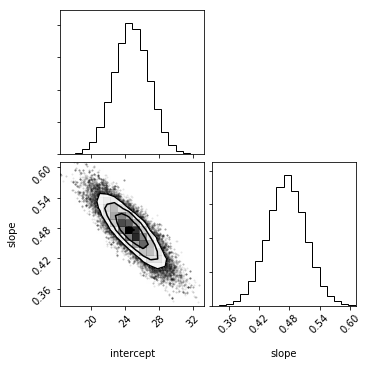

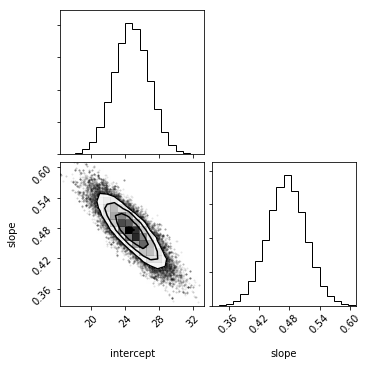

In [60]:
import corner
corner.corner(sampler.flatchain, labels=['intercept', 'slope'])

In [ ]:
# If corner is not installed, you can simply do the following
from scipy.stats import gaussian_kde
#t0, t1 = sampler.flatchain[:,0], sampler.flatchain[:,1]   # full chain ... a bit expensive for calculating the density of points
rd = np.random.choice(len(sampler.flatchain[:,0]), 1000)  # I pick 1000 random pos in my chain
t0 = [sampler.flatchain[i,0] for i in rd]
t1 = [sampler.flatchain[i,1] for i in rd]
# Calculate the point density
t01 = np.vstack([t0,t1])
density = gaussian_kde(t01)(t01)

f, ax = plt.subplots(ncols=3, figsize=(12,4))
ax[0].scatter(t0, t1, c=density)
h1 = ax[1].hist(t0, bins=100, normed=True)
h2 = ax[2].hist(t1, bins=100, normed=True)

#### V.2.2.5 Visualizing the posterior

A way to visualize the posterior is to plot the model over the data.
Each point in the two-dimensional space ($\theta_0$,$\theta_1$) explored by the sampler, corresponds to a possible model for our data. If we select ~100 of these at random and plot them over our data, it will give us a good idea of the spread in the model results:

In [ ]:
chain = sampler.flatchain
chain.shape

In [ ]:
plt.errorbar(x, y, dy, fmt='o');

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]  # you randomly pick 100 pairs of parameters from the chain

In [ ]:
xfit = np.linspace(0, 100)
for i in range(100):
    theta = thetas[i]
    plt.plot(xfit, theta[0] + theta[1] * xfit, color='black', alpha=0.05)

### V.2.3. Fitting a straight line with intrinsic scatter

Above we have done a simple model, where the data is drawn from a straight line.

Often, however, we will be modeling relationships where there is some intrinsic scatter in the model itself: that is, even if the data were *perfectly* measured, they would not fall along a perfect straight line, but would have some (unknown) scatter about that line.

Here we'll make a slightly more complicated model in which we will fit for the slope, intercept, and intrinsic scatter (i.e. intrinsic scatter is a parameter of our model) all at once.

In [ ]:
def make_data_scatter(intercept, slope, scatter, N=20, dy=2, rseed=42):
    rand = np.random.RandomState(rseed)
    x = 100 * rand.rand(20)
    y = intercept + slope * x
    y += np.sqrt(dy ** 2 + scatter ** 2) * rand.randn(20)
    return x, y, dy * np.ones_like(x)

theta = (25, 0.5, 3.0)  # (intercept, slope, intrinsic scatter)
x, y, dy = make_data_scatter(*theta)
plt.errorbar(x, y, dy, fmt='o')

We will now go through the different steps to solve this problem in a Bayesian way, and use MCMC to evaluate the posterior on the parameters. 

#### V.2.3.1 Defining the likelihood and prior

You are now getting familiar with the first step of the procedure which consists in deriving an expression for the likelihood. The likelihood for this model looks very similar to what we used above, except that the intrinsic scatter is added *in quadrature* to the measurement error.


$$
P(D\mid\boldsymbol{\theta}) =  \prod_{i=1}^{N} \frac{1}{\sqrt{2\,\pi (\sigma_i^2 + \sigma^2)}} \, \exp\left[\left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,(\sigma_i^2+\sigma^2)} \right)\right]
$$

For the prior, you can use either a flat or symmetric prior on the slope and intercept, but on the intrinsic scatter $\sigma$ it is best to use a scale-invariant Jeffreys Prior:

$$
P(\sigma)\propto\sigma^{-1}
$$

As discussed before, this has the nice feature that the resulting posterior will not depend on the units of measurement.

### Exercise

In [ ]:
# Define functions to compute the log-prior, log-likelihood, and log-posterior

# theta = [intercept, slope, scatter]

def ln_prior(theta):
    # fill this in
    return
    
def ln_likelihood(theta, x, y, dy):
    # fill this in
    return

def ln_posterior(theta, x, y, dy):
    # fill this in
    return

#### Sampling from the Posterior

In [ ]:
# Using emcee, create and initialize a sampler and draw 200 samples from the posterior.
# Remember to think about what starting guesses should you use!
# You can use the above as a template



#### Visualizing the Chains

In [ ]:
# Plot the three chains as above

#### Resetting and getting a clean sample

In [ ]:
# Are your chains stabilized? Reset them and get a clean sample

#### Visualizing the results

In [22]:
# Use e.g. corner.py to visualize the three-dimensional posterior

In [ ]:
# Next plot ~100 of the samples as models over the data to get an idea of the fit

## XX References:

**Chapter 5 ** (5.1, 5.2, 5.3, 5.8) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

- This notebook includes a large fraction of the material that J. Vander Plas gave during the "Bayesian Methods in Astronomy workshop", presented at the 227th meeting of the American Astronomical Society. The full repository with that material can be found on GitHub: http://github.com/jakevdp/AAS227Workshop

- More insights on the differences between frequentist and Bayesian approaches: see [J. VanderPlass blog posts](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/) 

- Jayes: [*Probability Theory: The Logic of Science*](http://bayes.wustl.edu/etj/prob/book.pdf).

- For some approachable reading on frequentist vs. Bayesian uncertainties, I'd suggest [The Fallacy of Placing Confidence in Confidence Intervals](https://learnbayes.org/papers/confidenceIntervalsFallacy/), as well as Jake VanderPlast blog post on the topic, [Confidence, Credibility, and why Frequentism and Science do not Mix](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/).

- Foreman-Mackey et al. 2012 [*EMCEE, the MCMC hammer*](https://arxiv.org/abs/1202.3665) ; see also http://dan.iel.fm/emcee/current/

- About the variety of approaches to MCMC: Allison and Dunkley 2013: [Comparison of sampling techniques for Bayesian parameter estimation](https://arxiv.org/abs/1308.2675). See also [How to Be a Bayesian in Python](http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/). 

- Andreon 2011 [Understanding better (some) astronomical data using Bayesian methods](https://arxiv.org/abs/1112.3652)